# Analiza sportowa - Analiza Danych
## Projekt realizowany w ramach przedmiotu: Metody Przetwarzania Dużych Ilości Danych
### Grupa projektowa:
+  Filip Kozak
+  Maciej Grzela
+  Paweł Owczarek
+  Szymon Tusznio

### Zaimportowanie wykorzystywanych bibliotek oraz konfiguracja wyświetlania zbiorów danych dla biblioteki Pandas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from scipy.stats import kde

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 320)
pd.reset_option("display.max_rows")

css = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(css))

### Wczytanie danych z pliku csv oraz zapisanie ich do struktury DataFrame dostępnej w ramach biblioteki Pandas

In [6]:
transfer_df = pd.read_csv(
    'csv/transfers-data-frame-cleared.csv',
    sep=',',
    header=0,
    index_col=0,
)

transfer_df = transfer_df.fillna("")

### Wyświetlenie szczegółów dotyczących zbioru danych

In [7]:
display(transfer_df.head(10))
display(transfer_df.shape)
display(transfer_df.info())
display(transfer_df.describe())

,Club,ClubLeagueLevel,ClubLeagueNationality,Player,PlayerAge,PlayerHeight,TransferDate,PlayerMatchesPlayed,PlayerGoals,PlayerAssists,PlayerOwnGoals,PlayerSubstitutionIn,PlayerSubstitutionOut,PlayerYellowCards,PlayerSecondYellowCards,PlayerRedCards,PlayerMinutesPlayed,PlayerPosition,PlayerPositionScut,PlayerNationality,Operation,Bought/Sold,PlayerMarketValue,ClubAssigned,ClubAssignedLeagueLevel,ClubAssignedLeagueNationality,TransferValue,PlayerWithoutClub,PlayerGenericPosition,PlayerAgeGroup
0,Legia Warszawa,1,Polska,Ernest Muci,19,1.80,2021-02-23,94,24,6,0,41,26,6,0,0,5004,Środkowy napastnik,ŚNP,Albania,Transfer,Kupiony,1000000,KF Tirana,1,Albania,500000,False,Napastnik,Młody
1,Legia Warszawa,1,Polska,Josip Juranovic,24,1.73,2021-08-21,224,8,23,3,23,12,18,0,1,18428,Prawy obrońca,POB,Chorwacja,Transfer,Kupiony,2500000,HNK Hajduk Split,1,Chorwacja,400000,False,Obrońca,W sile wieku
2,Legia Warszawa,1,Polska,Jasur Yakhshiboev,23,1.80,2021-08-30,103,23,13,0,50,31,14,0,0,5086,Prawy napastnik,PNP,Uzbekistan,Transfer,Kupiony,700000,Pakhtakor Tashkent,1,Uzbekistan,300000,False,Napastnik,W sile wieku
3,Legia Warszawa,1,Polska,Rafa Lopes,29,1.85,2020-08-01,375,75,19,1,123,120,41,0,1,23321,Ofensywny pomocnik,OPM,Portugalia,Transfer,Kupiony,500000,Cracovia,1,Polska,150000,False,Pomocnik,W sile wieku
4,Legia Warszawa,1,Polska,Bartosz Kapustka,23,1.79,2020-08-13,151,20,19,0,36,54,25,0,1,10003,Ofensywny pomocnik,OPM,Polska,Transfer,Kupiony,1500000,Leicester City,1,Anglia,0,False,Pomocnik,W sile wieku
5,Legia Warszawa,1,Polska,Artur Boruc,40,1.93,2020-08-01,565,1,0,1,2,6,36,0,0,50650,Bramkarz,BRK,Polska,Transfer,Kupiony,50000,AFC Bournemouth,2,Anglia,0,False,Bramkarz,Zbliżający się do końca kariery
6,Legia Warszawa,1,Polska,Filip Mladenovic,28,1.80,2020-07-21,342,22,48,1,32,41,80,0,2,27869,Lewy obrońca,LOB,Serbia,Transfer,Kupiony,2500000,Lechia Gdańsk,1,Polska,0,False,Obrońca,W sile wieku
7,Legia Warszawa,1,Polska,Michal Karbownik,19,1.75,2021-08-28,121,0,14,0,15,19,14,0,1,9672,Prawy obrońca,POB,Polska,Wypożyczenie,Kupiony,5000000,Brighton & Hove Albion,1,Anglia,0,False,Obrońca,Młody
8,Legia Warszawa,1,Polska,Joel Valencia,25,1.64,2019-07-31,217,12,11,0,84,74,19,0,0,12278,Lewy napastnik,LNP,Ekwador,Wypożyczenie,Kupiony,400000,FC Brentford,1,Anglia,0,False,Napastnik,W sile wieku
9,Legia Warszawa,1,Polska,Bartlomiej Ciepiela,19,1.82,2020-11-21,95,13,9,0,27,42,25,3,0,5707,Ofensywny pomocnik,OPM,Polska,Transfer,Kupiony,0,Legia Warszawa II,4,Polska,0,False,Pomocnik,Młody


(17630, 30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17630 entries, 0 to 27109
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Club                           17630 non-null  object 
 1   ClubLeagueLevel                17630 non-null  int64  
 2   ClubLeagueNationality          17630 non-null  object 
 3   Player                         17630 non-null  object 
 4   PlayerAge                      17630 non-null  int64  
 5   PlayerHeight                   17630 non-null  float64
 6   TransferDate                   17630 non-null  object 
 7   PlayerMatchesPlayed            17630 non-null  int64  
 8   PlayerGoals                    17630 non-null  int64  
 9   PlayerAssists                  17630 non-null  int64  
 10  PlayerOwnGoals                 17630 non-null  int64  
 11  PlayerSubstitutionIn           17630 non-null  int64  
 12  PlayerSubstitutionOut          17630 non-null 

None

,ClubLeagueLevel,PlayerAge,PlayerHeight,PlayerMatchesPlayed,PlayerGoals,PlayerAssists,PlayerOwnGoals,PlayerSubstitutionIn,PlayerSubstitutionOut,PlayerYellowCards,PlayerSecondYellowCards,PlayerRedCards,PlayerMinutesPlayed,PlayerMarketValue,ClubAssignedLeagueLevel,TransferValue
count,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,1.763000e+04,17630.000000,1.763000e+04
mean,1.132218,24.710380,1.816820,172.559955,22.140896,13.105956,0.332672,37.542484,40.477425,23.286727,0.689620,0.658026,12159.984118,1.738286e+06,1.816733,5.464941e+05
std,0.450184,4.157618,0.069364,114.459166,30.600317,17.254821,0.772194,32.351002,38.048891,20.889660,1.157749,1.047655,8791.845997,4.685897e+06,1.453749,3.306832e+06
min,1.000000,15.000000,1.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00
25%,1.000000,21.000000,1.770000,86.000000,3.000000,2.000000,0.000000,13.000000,12.000000,8.000000,0.000000,0.000000,5539.000000,2.000000e+05,1.000000,0.000000e+00
50%,1.000000,24.000000,1.820000,150.000000,11.000000,7.000000,0.000000,29.000000,30.000000,17.000000,0.000000,0.000000,10179.500000,4.250000e+05,1.000000,0.000000e+00
75%,1.000000,28.000000,1.870000,237.000000,29.000000,18.000000,0.000000,54.000000,58.000000,32.000000,1.000000,1.000000,16642.000000,1.200000e+06,2.000000,0.000000e+00
max,3.000000,41.000000,2.040000,914.000000,432.000000,240.000000,8.000000,262.000000,280.000000,165.000000,11.000000,10.000000,78741.000000,8.000000e+07,8.000000,8.000000e+07


### Przypisanie typu string dla wszystkich kolumn tekstowych

In [8]:
transfer_df['Club'] = transfer_df['Club'].astype("string")
transfer_df['ClubLeagueNationality'] = transfer_df['ClubLeagueNationality'].astype("string")
transfer_df['TransferValue'] = transfer_df['TransferValue'].astype("string")
transfer_df['Player'] = transfer_df['Player'].astype("string")
transfer_df['PlayerPosition'] = transfer_df['PlayerPosition'].astype("string")
transfer_df['PlayerPositionScut'] = transfer_df['PlayerPositionScut'].astype("string")
transfer_df['PlayerGenericPosition'] = transfer_df['PlayerGenericPosition'].astype("string")
transfer_df['PlayerNationality'] = transfer_df['PlayerNationality'].astype("string")
transfer_df['Operation'] = transfer_df['Operation'].astype("string")
transfer_df['Bought/Sold'] = transfer_df['Bought/Sold'].astype("string")
transfer_df['ClubAssigned'] = transfer_df['ClubAssigned'].astype("string")
transfer_df['ClubAssignedLeagueNationality'] = transfer_df['ClubAssignedLeagueNationality'].astype("string")
transfer_df['PlayerAgeGroup'] = transfer_df['PlayerAgeGroup'].astype("string")

transfer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17630 entries, 0 to 27109
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Club                           17630 non-null  string 
 1   ClubLeagueLevel                17630 non-null  int64  
 2   ClubLeagueNationality          17630 non-null  string 
 3   Player                         17630 non-null  string 
 4   PlayerAge                      17630 non-null  int64  
 5   PlayerHeight                   17630 non-null  float64
 6   TransferDate                   17630 non-null  object 
 7   PlayerMatchesPlayed            17630 non-null  int64  
 8   PlayerGoals                    17630 non-null  int64  
 9   PlayerAssists                  17630 non-null  int64  
 10  PlayerOwnGoals                 17630 non-null  int64  
 11  PlayerSubstitutionIn           17630 non-null  int64  
 12  PlayerSubstitutionOut          17630 non-null 

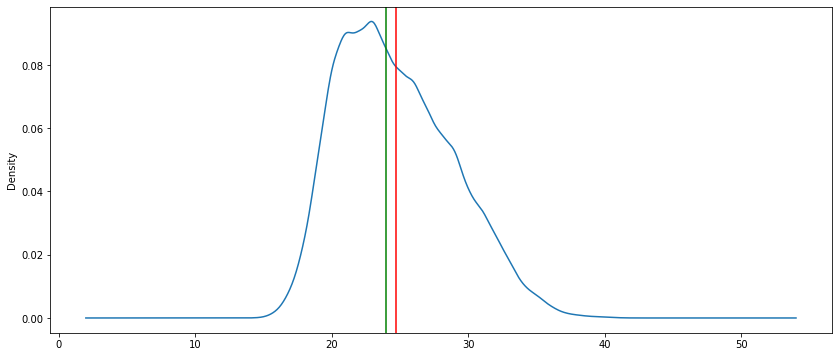

In [9]:
ax = transfer_df['PlayerAge'].plot(kind='density', figsize=(14,6))
ax.axvline(transfer_df['PlayerAge'].mean(), color='red')
ax.axvline(transfer_df['PlayerAge'].median(), color='green')

Diagram przedstawiający jaki % zawodników gra na danej pozycji

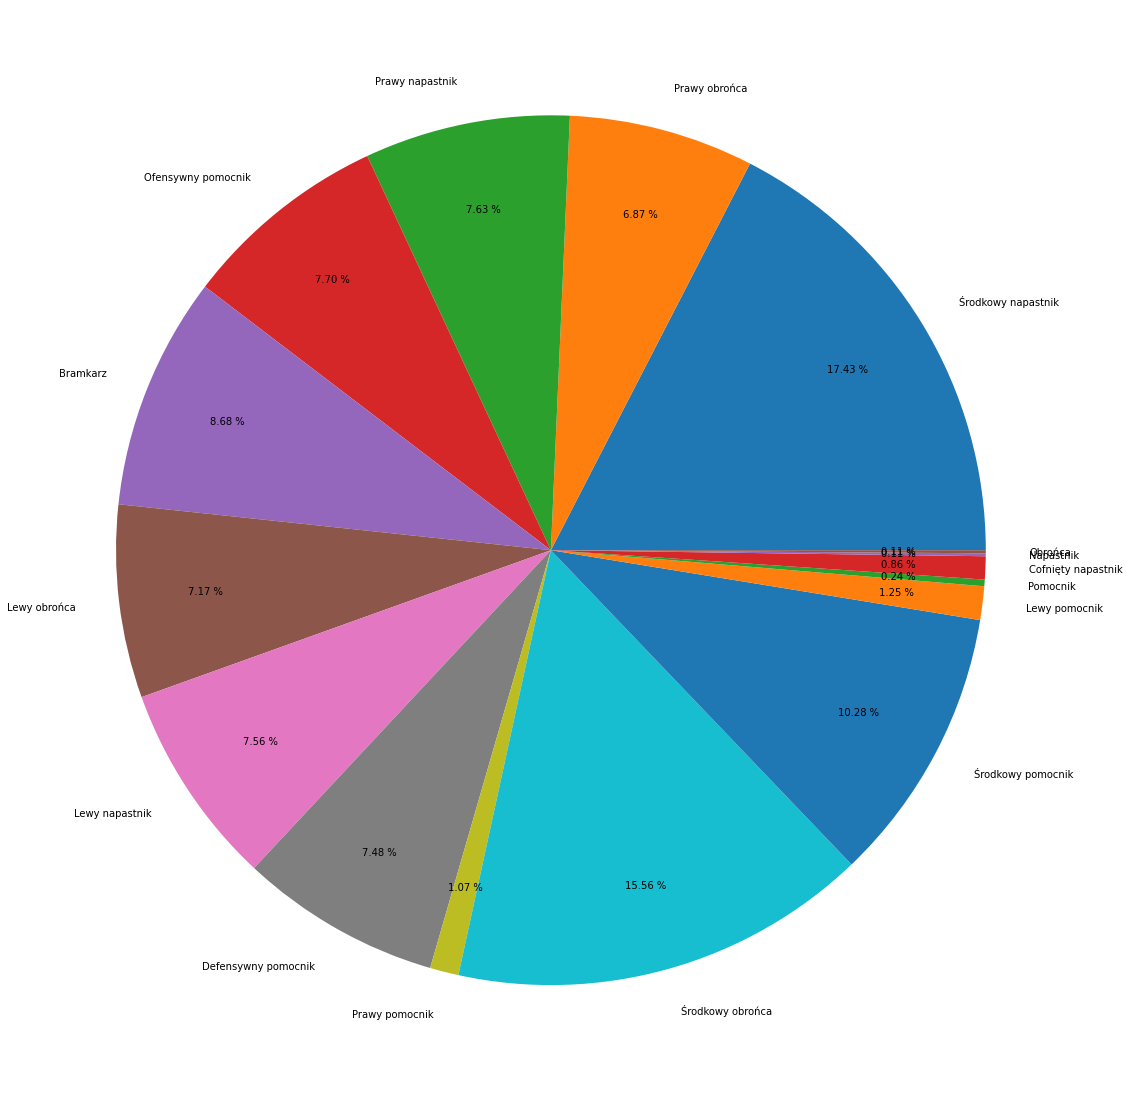

In [10]:
positions_unique_list = []
for position in transfer_df["PlayerPosition"]:
    if position not in positions_unique_list:
        positions_unique_list.append(position)

amout_of_players = []
for position in positions_unique_list:
    number = transfer_df.loc[transfer_df["PlayerPosition"] == position].count()[0]
    amout_of_players.append(number)

plt.figure(figsize=(20,20))
plt.pie(amout_of_players, labels=positions_unique_list, autopct='%.2f %%', pctdistance=0.8)
plt.show()

Diagram wskazuje liczbę piłkarzy w danej kategorii wiekowej

(array([4.4980e+03, 0.0000e+00, 1.0584e+04, 0.0000e+00, 5.8000e+01,
        0.0000e+00, 2.4550e+03, 0.0000e+00, 3.3000e+01, 2.0000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

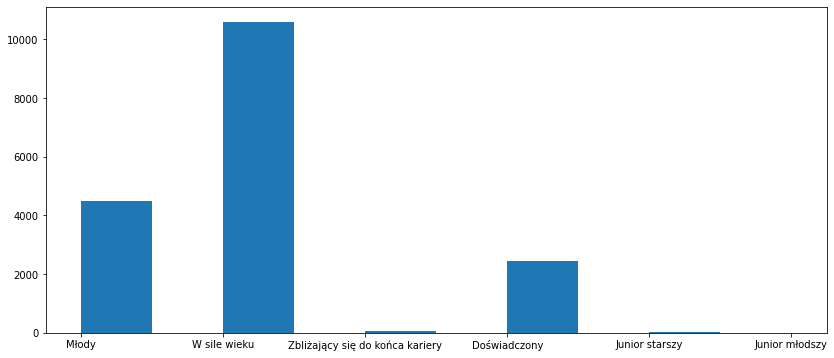

In [11]:
plt.figure(figsize=(14,6))
plt.hist(transfer_df['PlayerAgeGroup'])

Diagram demonstruje różnice wartości lig piłkarskich wynikacjące z ceny transferwej wszystkich zawodników grających w danej lidze

<BarContainer object of 37 artists>

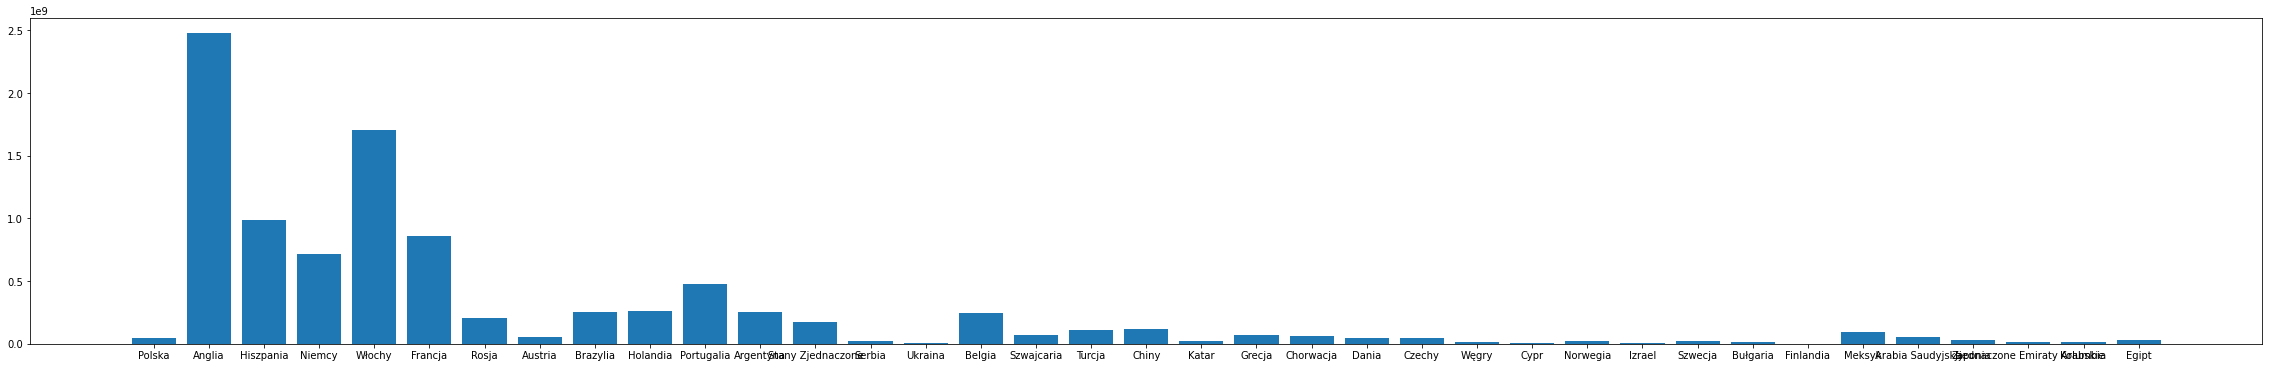

In [12]:
league_unique_list = []
for league in transfer_df["ClubLeagueNationality"]:
    if league not in league_unique_list:
        league_unique_list.append(league)

amout_of_money = []
for league in league_unique_list:
    transferValues = transfer_df.loc[(transfer_df['ClubLeagueNationality'] == league)]['TransferValue']
    sum = 0
    for value in transferValues:
        converted_value = int(value)
        sum= sum + converted_value
    amout_of_money.append(sum)
    
plt.figure(figsize=(40,6))
plt.bar(league_unique_list, amout_of_money)

C:\Python\Python392\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

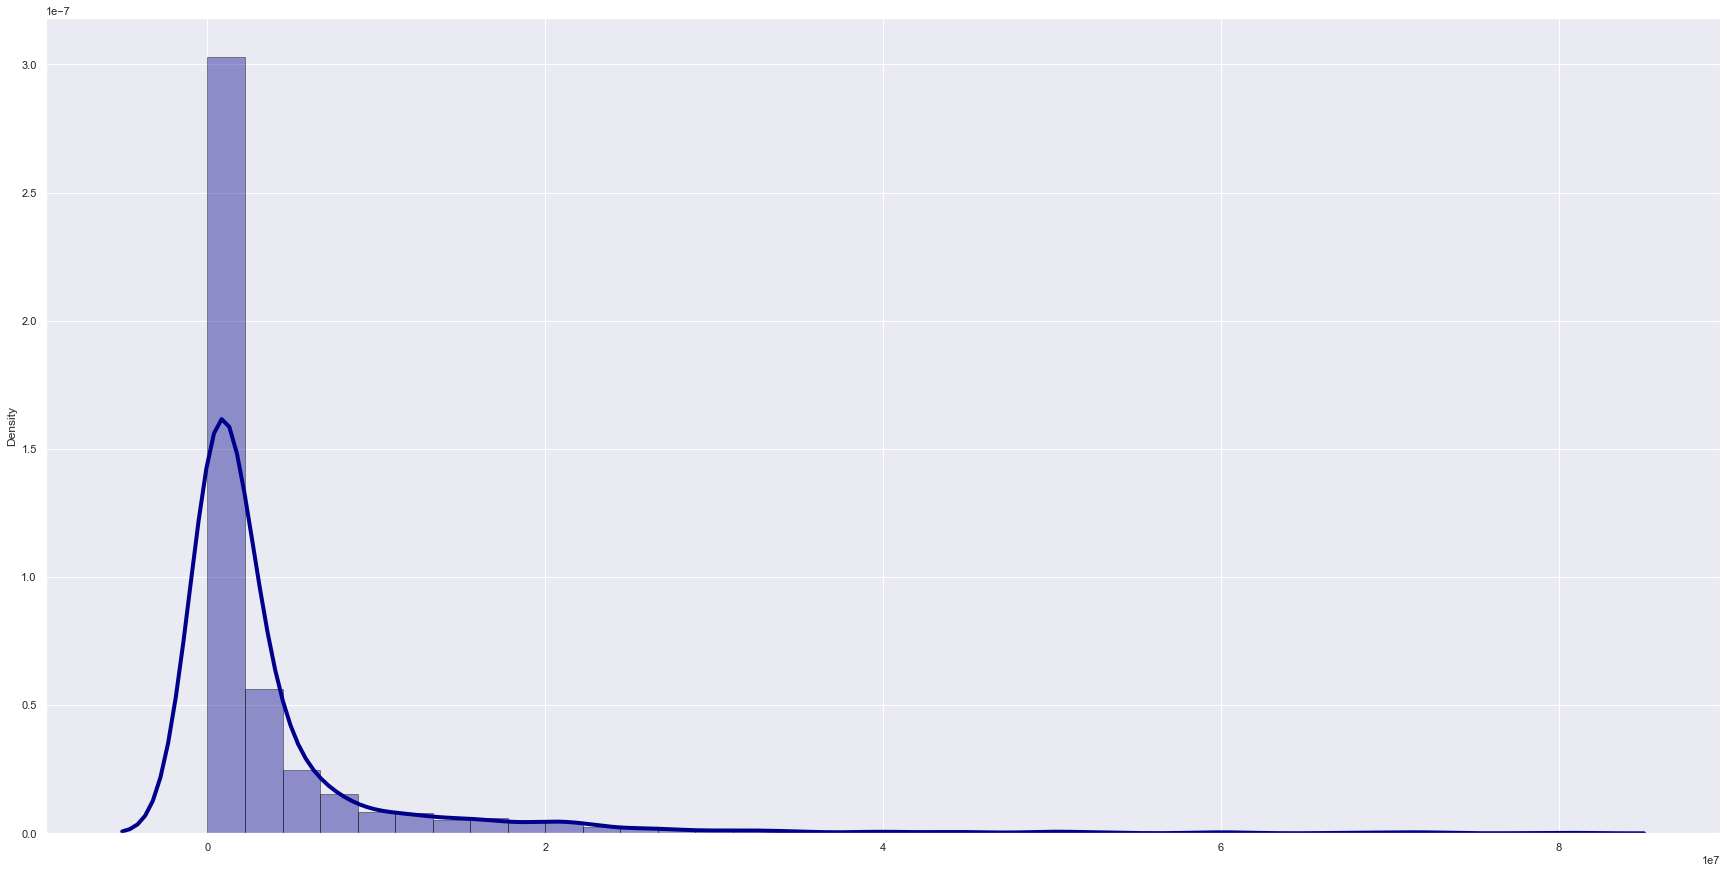

In [27]:
transfer_df['TransferValue'] = transfer_df['TransferValue'].astype("int64")
transferValues = []
for value in transfer_df["TransferValue"]:
    if value != 0:
        transferValues.append(value)
sns.set(rc={'figure.figsize':(30,15)})
sns.distplot(transferValues, kde=True, 
             bins=int(180/3), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


Wykres zawierający informację o % wszystkich goli strzelonych przez zawodników na danej pozycji

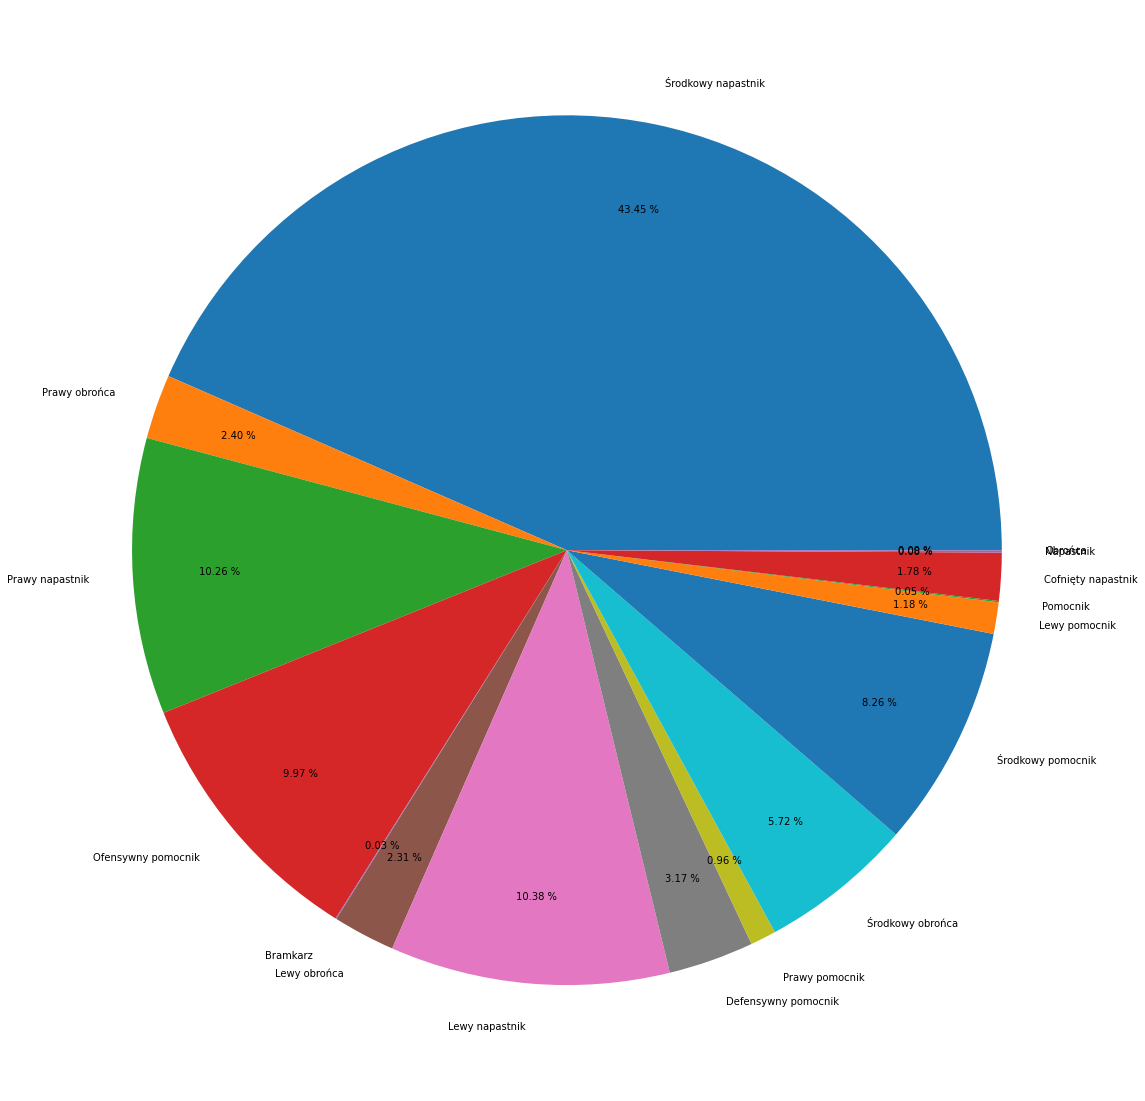

In [14]:
amout_of_goals = []
for position in positions_unique_list:
    goals = transfer_df.loc[(transfer_df['PlayerPosition'] == position)]['PlayerGoals']
    sum = 0
    for value in goals:
        converted_value = int(value)
        sum= sum + converted_value
    amout_of_goals.append(sum)
plt.figure(figsize=(20,20))

plt.pie(amout_of_goals, labels=positions_unique_list, autopct='%.2f %%', pctdistance=0.8)
plt.show()

Wykres wskazuje śrędnią bramek na mecz w zależności od pozycji na boisku

[169585, 9359, 40044, 38924, 135, 9022, 40536, 12386, 3747, 22333, 32227, 4587, 183, 6934, 323, 19]
[3073, 1212, 1346, 1357, 1530, 1264, 1333, 1318, 188, 2743, 1813, 220, 43, 151, 19, 20]
[0.2886199478531993, 0.04463638444809035, 0.16725629341274847, 0.16444166554008383, 0.0006796727501573317, 0.04335686515736206, 0.17708192266863543, 0.052450380483343, 0.11961691939345571, 0.0488239447858528, 0.09621522210976663, 0.12048540884137532, 0.08623939679547596, 0.22422713749838313, 0.21334214002642007, 0.024516129032258062]


<BarContainer object of 16 artists>

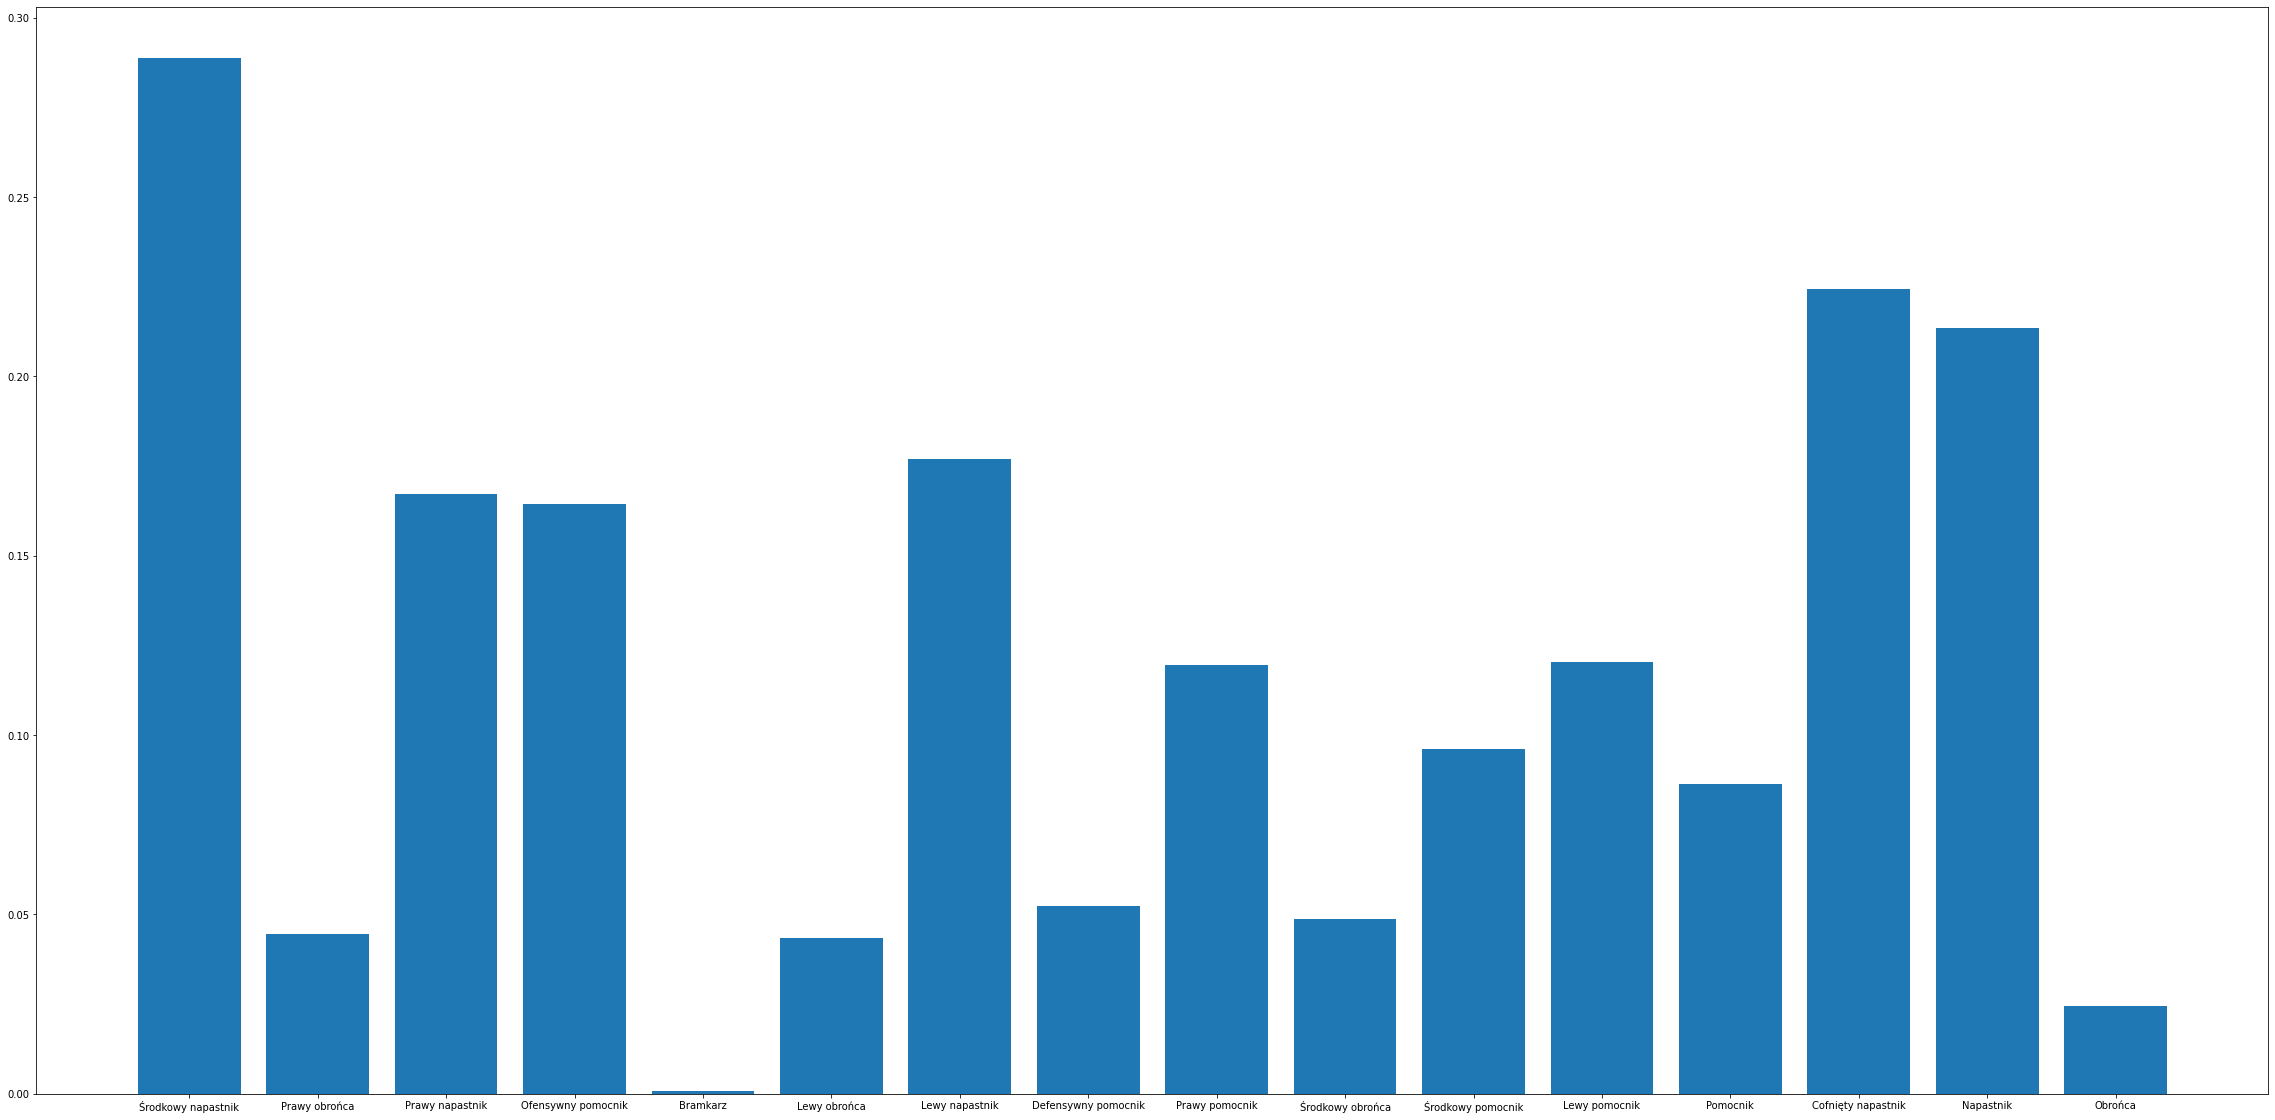

In [15]:
print(amout_of_goals)
print(amout_of_players)
gpratio = [i / j for i, j in zip(amout_of_goals, amout_of_players)]
amout_of_appearances = []
for position in positions_unique_list:
    appearances = transfer_df.loc[(transfer_df['PlayerPosition'] == position)]['PlayerMatchesPlayed']
    sum = 0
    for value in appearances:
        converted_value = int(value)
        sum= sum + converted_value
    amout_of_appearances.append(sum)
apratio = [i / j for i, j in zip(amout_of_appearances, amout_of_players)]
ggratio = [i / j for i, j in zip(gpratio, apratio)]
print(ggratio)
plt.figure(figsize=(40,20))
plt.bar(positions_unique_list, ggratio)